In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

import plotly as py 
import plotly.graph_objs as go

In [53]:
df = pd.read_csv("/Users/demie/Downloads/SHANK3 - Sheet1 (5).csv")
df.head()

,x,y,z
0,-19.440,-3.467,18.973
1,6.021,14.837,1.779
2,11.438,5.748,-10.387
3,-11.208,-13.904,-58.247
4,22.538,-20.197,-46.995


In [54]:
df.describe()

,x,y,z
count,18.000000,18.000000,18.000000
mean,9.097278,-11.930333,-24.453278
std,25.296151,32.341459,21.285054
min,-19.440000,-44.640000,-58.247000
25%,-10.674250,-36.124000,-39.127500
50%,1.660500,-16.289000,-29.548000
75%,26.852000,-4.760750,-9.566500
max,69.033000,65.074000,18.973000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       18 non-null     float64
 1   y       18 non-null     float64
 2   z       18 non-null     float64
dtypes: float64(3)
memory usage: 564.0 bytes


/tmp/ipykernel_42035/2622361598.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='x', ylabel='Density'>

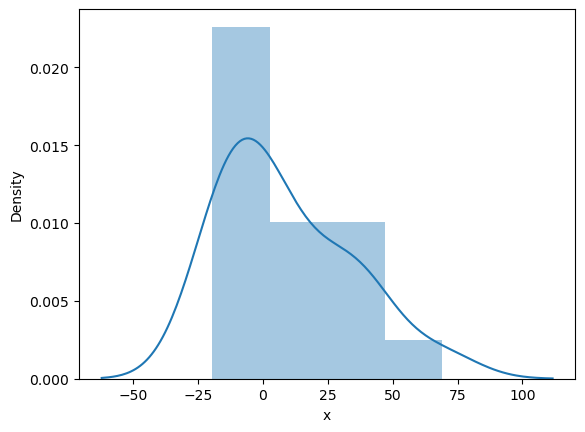

In [55]:
sns.distplot(df["x"])

/tmp/ipykernel_42035/398861187.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='y', ylabel='Density'>

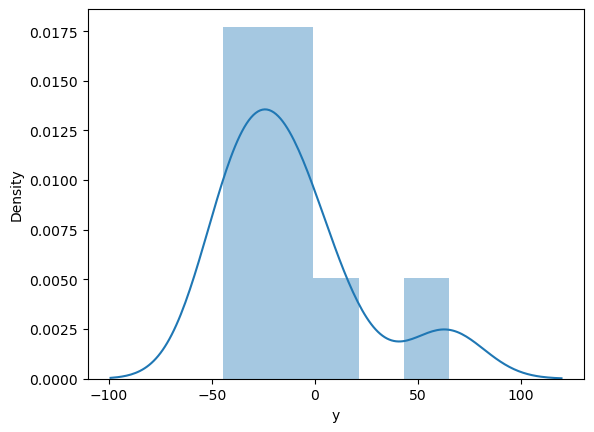

In [56]:
sns.distplot(df["y"])

/tmp/ipykernel_42035/1984511602.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='z', ylabel='Density'>

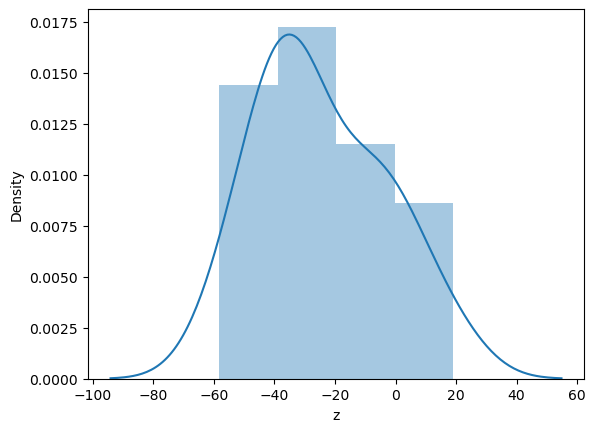

In [57]:
sns.distplot(df["z"])

In [58]:
df1 = df[["y", "z"]]

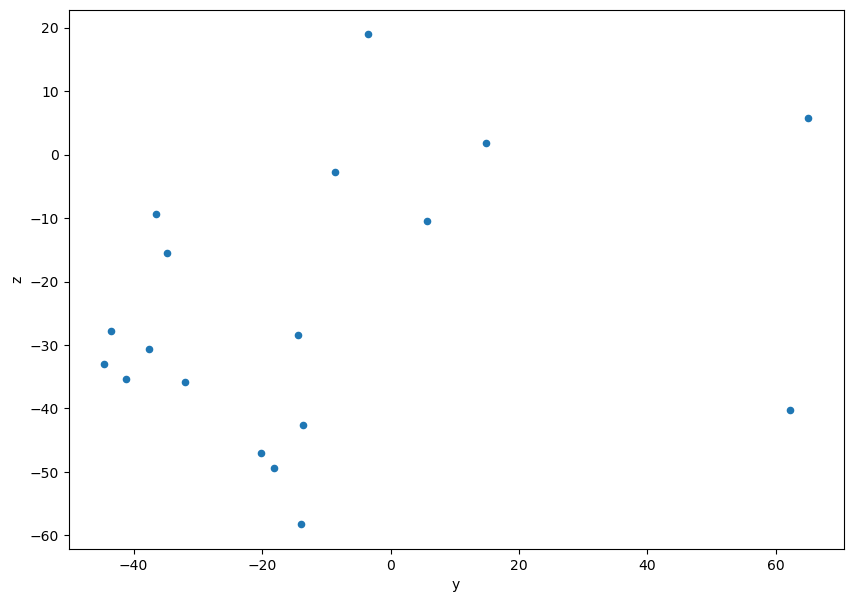

In [59]:
df1.plot(kind="scatter", 
        x = "y",
        y = "z",
        figsize=(10, 7))
plt.show()

In [61]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df1)
    sum_of_sqr_dist[k] = km.inertia_

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

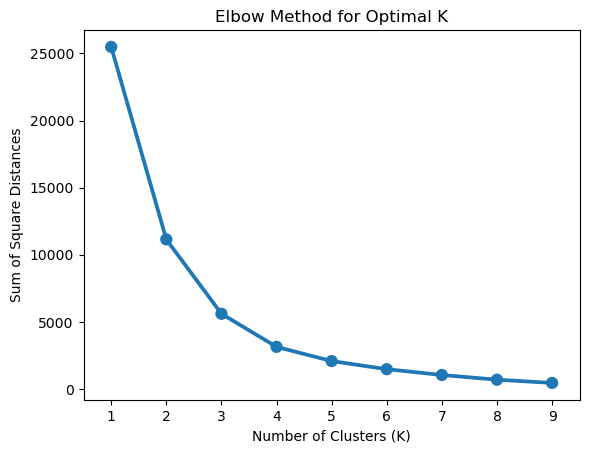

In [62]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [63]:
Model = KMeans(n_clusters=4,
              init='k-means++',
              max_iter=1000)
Model.fit(df1)

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=1000, n_clusters=4)

In [64]:
print("Labels", Model.labels_)

Labels [2 2 2 0 0 0 2 3 0 1 1 0 3 3 3 3 3 3]


In [65]:
print("Centroids", Model.cluster_centers_)

Centroids [[-16.0566 -45.1392]
 [ 63.6725 -17.247 ]
 [  2.119    1.892 ]
 [-38.612  -26.791 ]]


In [66]:
centroids = Model.cluster_centers_

In [67]:
df1_cluster = df1.copy()
df1_cluster["Cluster"] = Model.fit_predict(df1)

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [22]:
df1_cluster.head()

,y,z,Cluster
0,-3.467,18.973,2
1,14.837,1.779,2
2,5.748,-10.387,2
3,-13.904,-58.247,3
4,-20.197,-46.995,3


In [68]:
Color = ['red', 'blue', 'black', 'gold']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:Color[p])

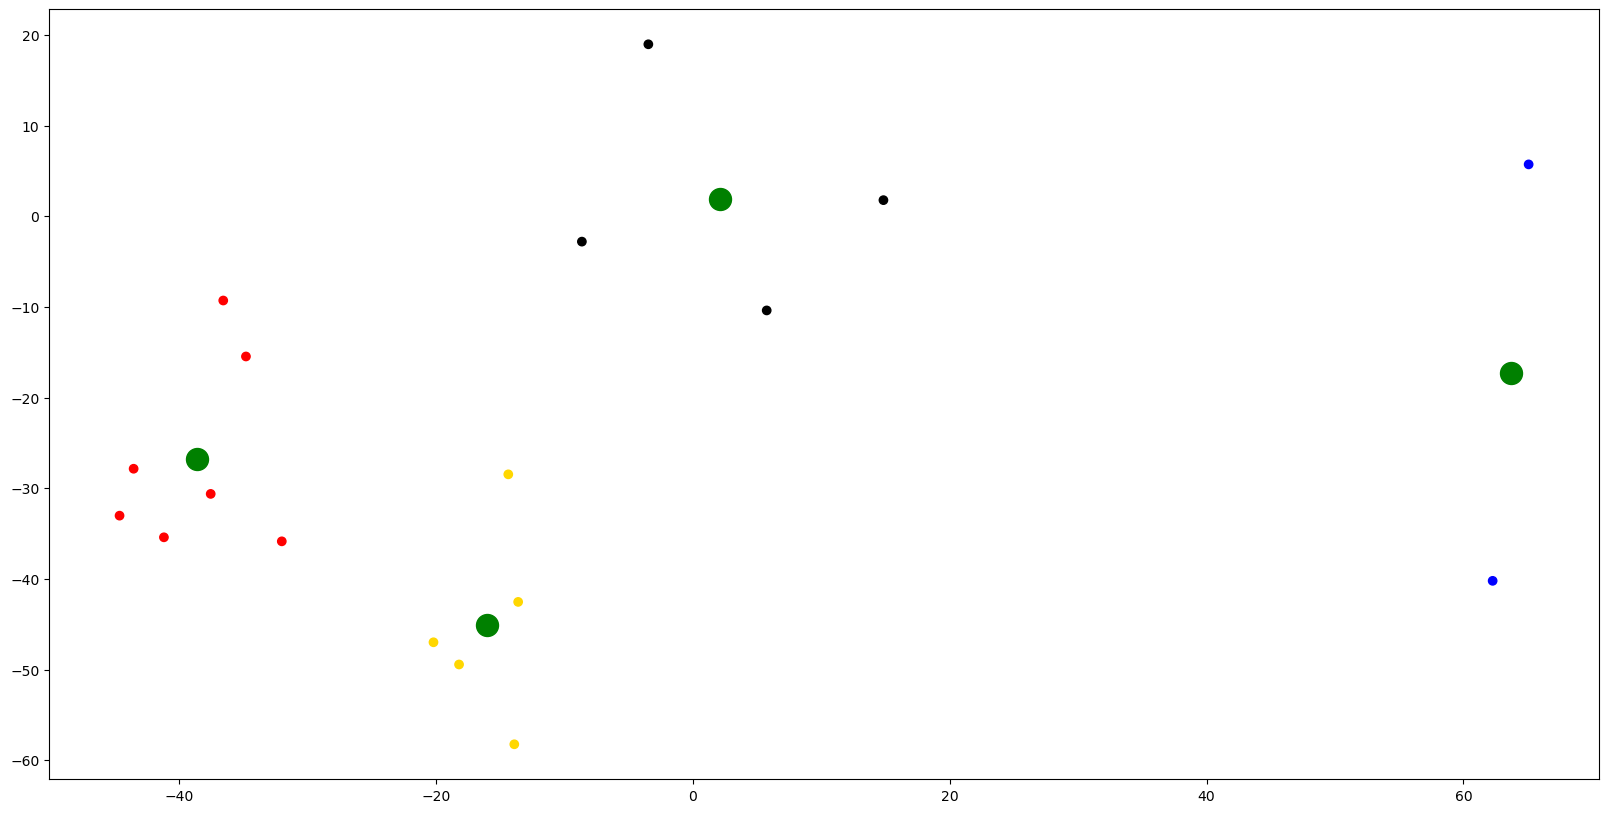

In [69]:
plt.figure(figsize=(20,10))
plt.scatter(df1["y"],
           df1["z"],
           c=df1_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()

In [70]:
labels = Model.labels_

In [71]:
silhouette_score(df1, labels)

0.512010910433354

In [72]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1)
    silhouette[k] = silhouette_score(df1, km.labels_)

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

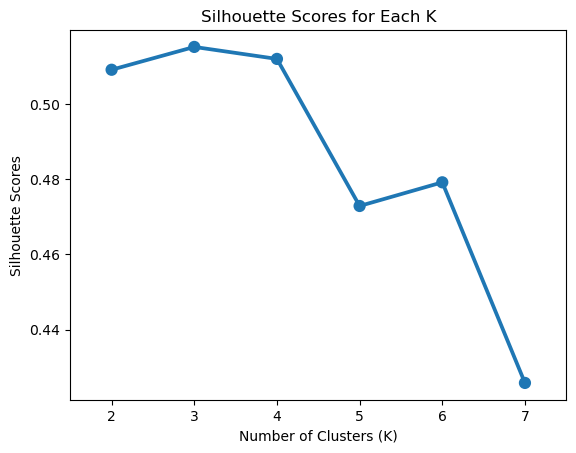

In [73]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

/tmp/ipykernel_42035/2622361598.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='x', ylabel='Density'>

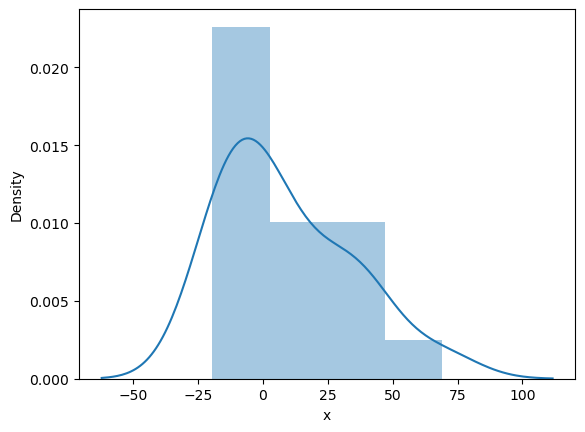

In [74]:
sns.distplot(df["x"])

In [75]:
df2= df.copy()

In [76]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df2)
    sum_of_sqr_dist[k] = km.inertia_

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:8

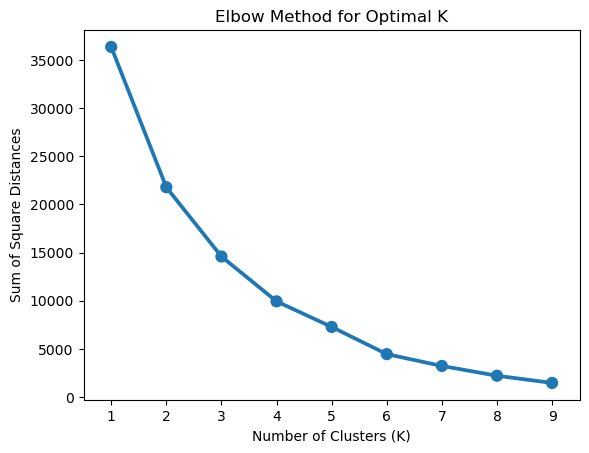

In [77]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [78]:
Model2 = KMeans(n_clusters=5, init='k-means++', max_iter=1000)
Model2.fit(df2)

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=1000, n_clusters=5)

In [79]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

/Users/demie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,x,y,z,Cluster
0,-19.440,-3.467,18.973,4
1,6.021,14.837,1.779,4
2,11.438,5.748,-10.387,4
3,-11.208,-13.904,-58.247,1
4,22.538,-20.197,-46.995,0


In [80]:
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [85]:
df2['labels'] = labels

trace = go.Scatter3d(
                    x = df2['x'],
                    y = df2['y'],
                    z = df2['z'],
                    mode = 'markers',
                    marker=dict(color=df2['labels'], size = 5, line=dict(color=df2['labels'], width=12),
                    opacity=0.8)
                    )
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'x'),
                                yaxis = dict(title = "y"),
                                zaxis = dict(title='z'))
                                )
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()